In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
eng_in = pd.read_csv("engineInputs.csv")
eng_in.head()

,In1,In2
0,17.5,576.2
1,35.9,598.6
2,31.4,612.1
3,23.7,624.2
4,20.2,635.2


In [3]:
eng_tar = pd.read_csv("engineTargets.csv")
eng_tar.head()

,T1,T2
0,57.6,848
1,24.8,905
2,22.3,578
3,15.6,382
4,16.5,298


In [4]:
eng_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   In1     1199 non-null   float64
 1   In2     1199 non-null   float64
dtypes: float64(2)
memory usage: 18.9 KB


In [5]:
eng_in.isna().sum()

In1    0
In2    0
dtype: int64

In [6]:
eng_tar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T1      1199 non-null   float64
 1   T2      1199 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 18.9 KB


In [7]:
eng_tar.isna().sum()

T1    0
T2    0
dtype: int64

In [8]:
engine = pd.concat([eng_in.reset_index(drop=True),eng_tar.reset_index(drop=True)],axis=1)
engine.head()

,In1,In2,T1,T2
0,17.5,576.2,57.6,848
1,35.9,598.6,24.8,905
2,31.4,612.1,22.3,578
3,23.7,624.2,15.6,382
4,20.2,635.2,16.5,298


In [9]:
X = engine.drop(['T1', 'T2'], axis=1).values
#y1 = ((engine['T1']).values).reshape(-1, 1)
#y2 = ((engine['T2']).values).reshape(-1, 1)
y2 = engine[['T1','T2']]

scaler = StandardScaler()
#y1 = scaler.fit_transform(y1)
#y2 = scaler.fit_transform(y2)
y2 = scaler.fit_transform(y2)

In [10]:
modelos = [('LR',LinearRegression()),
           ('Decision Tree',DecisionTreeRegressor()),
           ('KNN',KNeighborsRegressor())]
'''('LR',LinearRegression()),
           ('Decision Tree',DecisionTreeRegressor()),
           ('KNN',KNeighborsRegressor())'''

"('LR',LinearRegression()),\n           ('Decision Tree',DecisionTreeRegressor()),\n           ('KNN',KNeighborsRegressor())"

In [11]:
resultado_R = []
resultado_R2 = []
resultado_SSE = []
resultado_MAE = []
resultado_MSE = []
resultado_RMSE = []
resultado_RMSLE = []

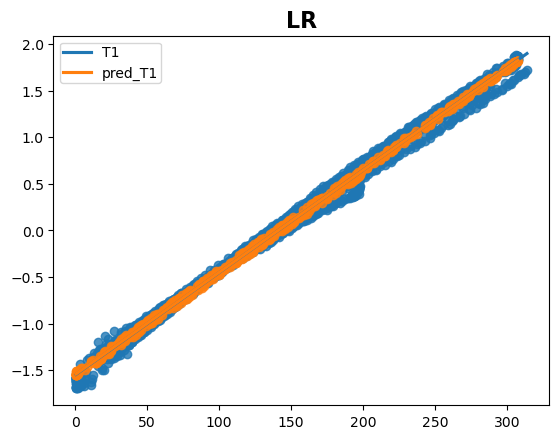

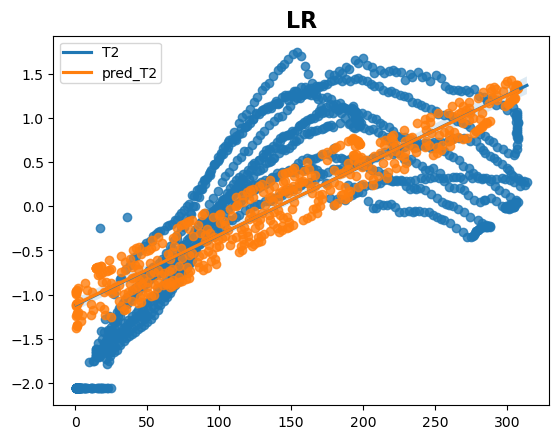

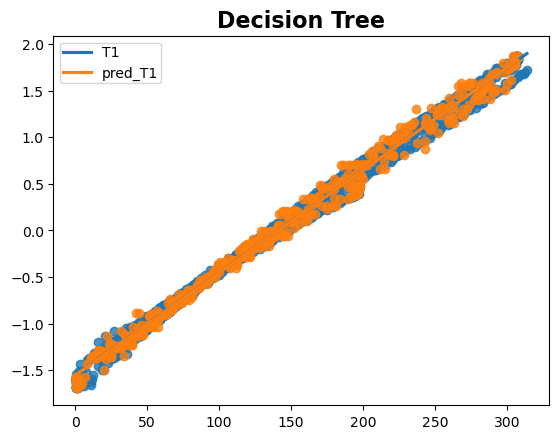

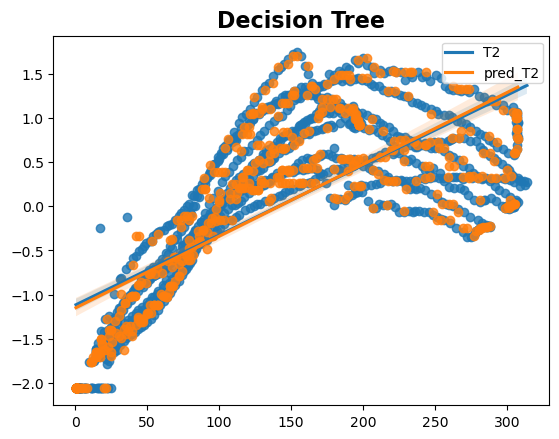

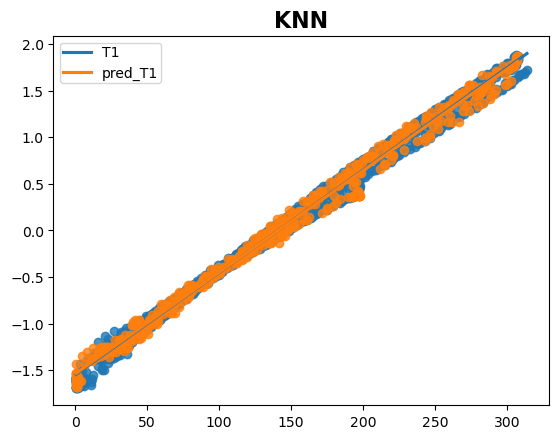

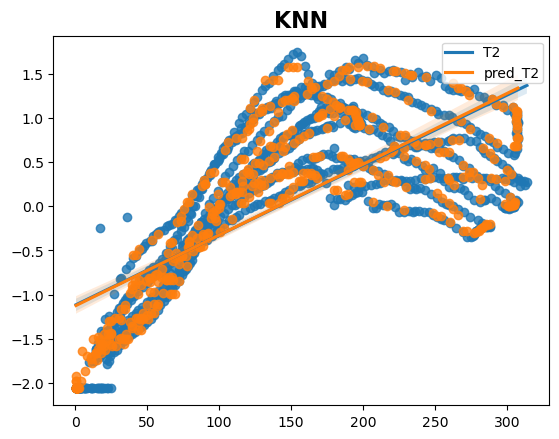

In [12]:
#Hold-Out (60/40)
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.40, shuffle=True)

for nombre,modelo in modelos:
    modelo.fit(X_train,y_train)
    y_pred = modelo.predict(X_test)
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,0], line_kws={'label': 'T1'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,0], line_kws={'label': 'pred_T1'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    fig, bx = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,1], line_kws={'label': 'T2'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,1], line_kws={'label': 'pred_T2'})
    bx.legend(borderpad=.2)
    bx.set_title(nombre,fontsize=16, weight="bold")

    
    try:
        RMSLE = mean_squared_log_error(y_test,y_pred,squared=False)
    except:
        RMSLE = 1.0
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,np.sum((y_test-y_pred)**2)))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,mean_absolute_error(y_test,y_pred)))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,mean_squared_error(y_test,y_pred)))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,mean_squared_error(y_test,y_pred,squared=False)))
    #RMSLE (Root Mean Squared Logaritmic Error)
    resultado_RMSLE.append((nombre,RMSLE))

resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSLE.sort(key=lambda k:k[1], reverse=True)

In [13]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('KNN', array([0.99761723])),
 ('Decision Tree', array([0.99714046])),
 ('LR', array([0.88506146]))]

In [14]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('KNN', array([0.99524014])),
 ('Decision Tree', array([0.9942891])),
 ('LR', array([0.78333378]))]

In [15]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('LR', 209.44191175224358),
 ('Decision Tree', 5.518853349899699),
 ('KNN', 4.810821875106711)]

In [16]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('LR', 0.30153049823996586),
 ('Decision Tree', 0.04860237358811753),
 ('KNN', 0.03939680471856088)]

In [17]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('LR', 0.21816865807525376),
 ('Decision Tree', 0.005748805572812184),
 ('KNN', 0.005011272786569493)]

In [18]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('LR', 0.36587867204435437),
 ('Decision Tree', 0.07417653760891198),
 ('KNN', 0.06695687874542774)]

In [19]:
print("RMSLE (Root Mean Squared Logaritmic Error)")
resultado_RMSLE

RMSLE (Root Mean Squared Logaritmic Error)


[('LR', 1.0), ('Decision Tree', 1.0), ('KNN', 1.0)]

In [20]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_RMSLE.clear()

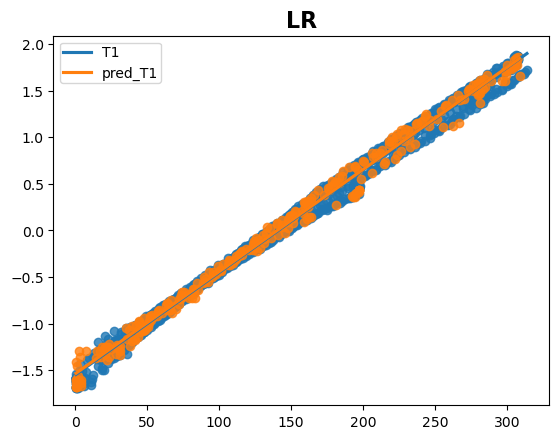

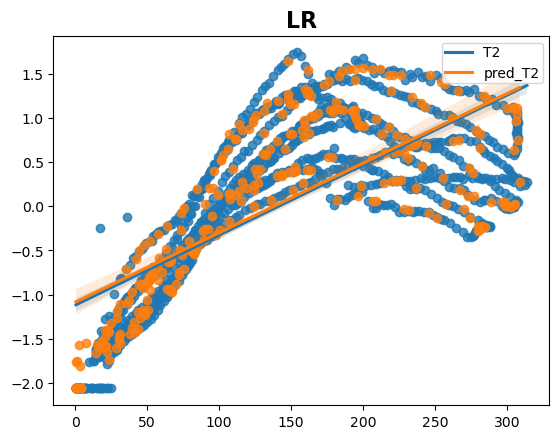

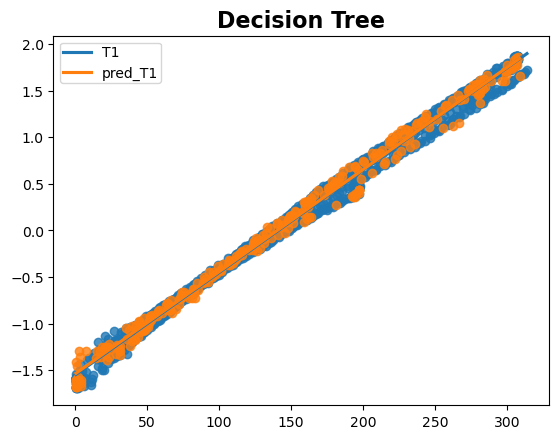

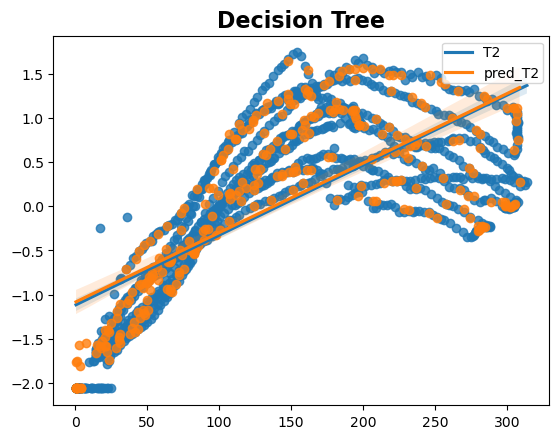

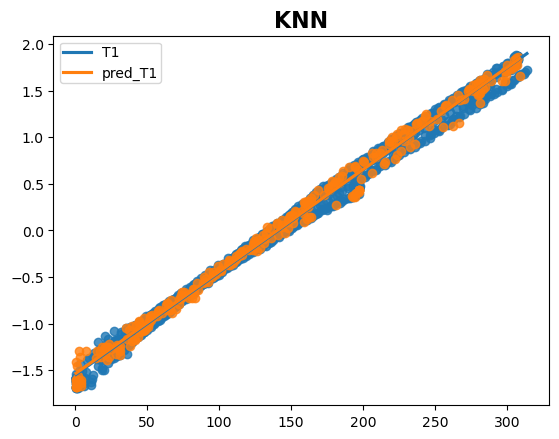

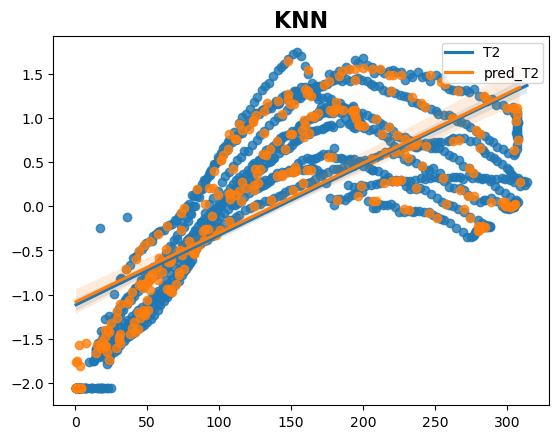

In [21]:
#Random subsampling (N=30)
R = [0,0,0]
R2 = [0,0,0]
SSE = [0,0,0]
MAE = [0,0,0]
MSE = [0,0,0]
RMSE = [0,0,0]
RMSLE1 = 0.0
RMSLE2 = 0.0
RMSLE3 = 0.0

l_test = [0,0,0]
l_pred = [0,0,0]

for i in range(30):
    j=0
    X_train, X_test, y_train, y_test = train_test_split(X, y2, shuffle=True)

    for nombre,modelo in modelos:
        modelo.fit(X_train,y_train)
        y_pred = modelo.predict(X_test)
        if i == 0:
            l_test[j] = y_test
            l_pred[j] = y_pred
        else:
            for k in range(len(y_test)):
                l_test[j][k] += y_test[k]
                l_pred[j][k] += y_pred[k]
        
        try:
            RMSLE = mean_squared_log_error(y_test,y_pred,squared=False)
        except:
            RMSLE = 1.0
            
        #R (Pearson correlation coefficient)
        R[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))
        #R2 (coefficient of determination)
        R2[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2
        #SSE (sum of squared errors)
        SSE[j] += np.sum((y_test-y_pred)**2)
        #MAE (mean absolute error)
        MAE[j] += mean_absolute_error(y_test,y_pred)
        #MSE (mean squared error)
        MSE[j] += mean_squared_error(y_test,y_pred)
        #RMSE (root mean squared error)
        RMSE[j] += mean_squared_error(y_test,y_pred,squared=False)
        #RMSLE (Root Mean Squared Logaritmic Error)
        if nombre == "LR":
            RMSLE1 += RMSLE
        elif nombre == "Decision Tree":
            RMSLE2 += RMSLE
        else:
            RMSLE3 += RMSLE
        
        j += 1
        
j=0
for nombre, modelo in modelos:
    for k in range(len(y_test)):
        l_test[j][k] /= 30
        l_pred[j][k] /= 30
    
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,0], line_kws={'label': 'T1'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,0], line_kws={'label': 'pred_T1'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    fig, bx = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,1], line_kws={'label': 'T2'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,1], line_kws={'label': 'pred_T2'})
    bx.legend(borderpad=.2)
    bx.set_title(nombre,fontsize=16, weight="bold")
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,R[j]/30))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,R2[j]/30))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,SSE[j]/30))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,MAE[j]/30))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,MSE[j]/30))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,RMSE[j]/30))
    #RMSLE (Root Mean Squared Logaritmic Error)
    if nombre == "LR":
        resultado_RMSLE.append((nombre,RMSLE1/30))
    elif nombre == "Decision Tree":
        resultado_RMSLE.append((nombre,RMSLE2/30))
    else:
        resultado_RMSLE.append((nombre,RMSLE3/30))
    
    j += 1
    
resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSLE.sort(key=lambda k:k[1], reverse=True)

In [22]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('KNN', array([0.99787783])),
 ('Decision Tree', array([0.99570132])),
 ('LR', array([0.87857679]))]

In [23]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('KNN', array([0.99576067])),
 ('Decision Tree', array([0.99142368])),
 ('LR', array([0.77194852]))]

In [24]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('LR', 134.4730475235401),
 ('Decision Tree', 5.074045396775427),
 ('KNN', 2.5586816262037013)]

In [25]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('LR', 0.30704695325056347),
 ('Decision Tree', 0.04955579640310373),
 ('KNN', 0.031205647192513383)]

In [26]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('LR', 0.22412174587256675),
 ('Decision Tree', 0.008456742327959045),
 ('KNN', 0.00426446937700617)]

In [27]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('LR', 0.37067738387245935),
 ('Decision Tree', 0.08450495083355941),
 ('KNN', 0.059392372240905385)]

In [28]:
print("RMSLE (Root Mean Squared Logaritmic Error)")
resultado_RMSLE

RMSLE (Root Mean Squared Logaritmic Error)


[('LR', 1.0), ('Decision Tree', 1.0), ('KNN', 1.0)]

In [29]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_RMSLE.clear()
R.clear()
R2.clear()
SSE.clear()
MAE.clear()
MSE.clear()
RMSE.clear()
l_test.clear()
l_test.clear()
l_test.clear()
l_pred.clear()
l_pred.clear()
l_pred.clear()

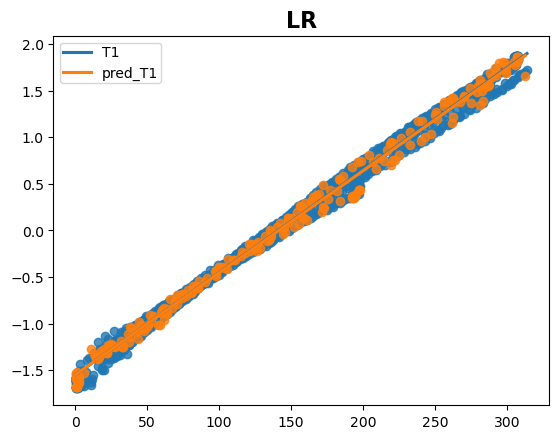

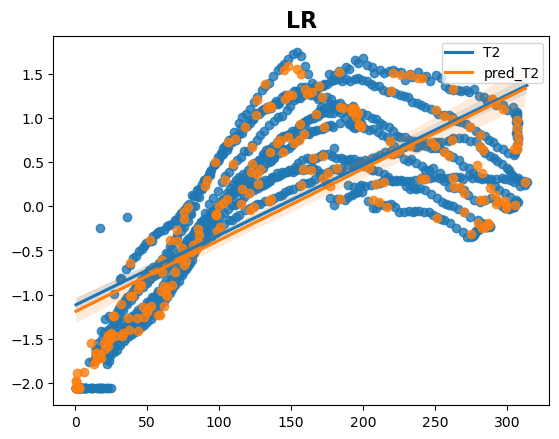

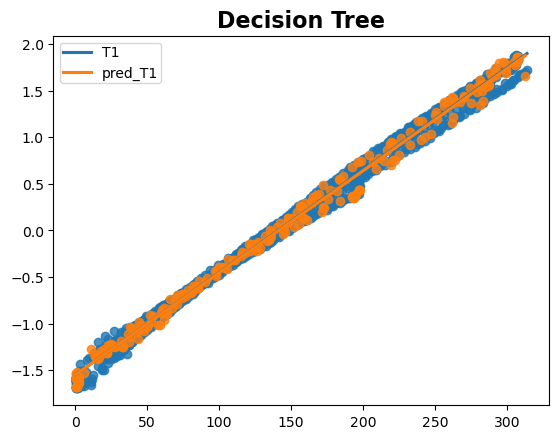

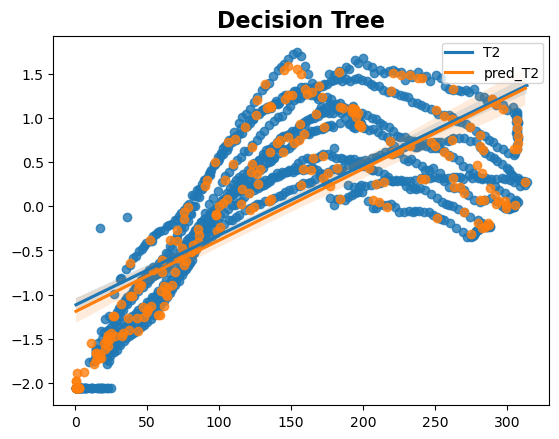

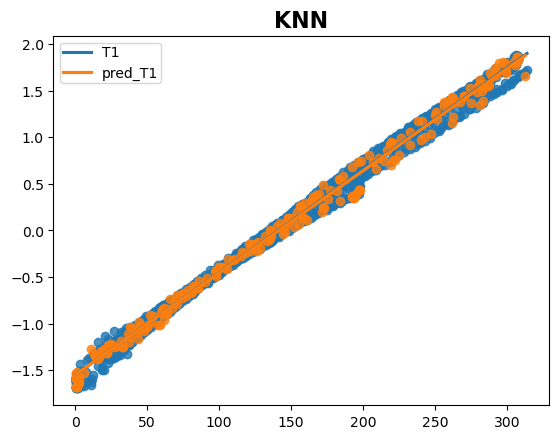

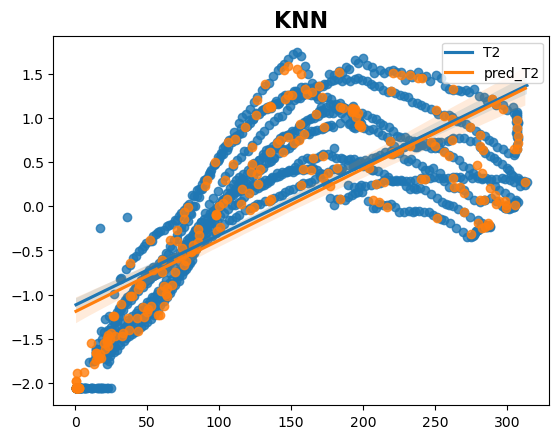

In [30]:
#K-fold (K=5)
R = [0,0,0]
R2 = [0,0,0]
SSE = [0,0,0]
MAE = [0,0,0]
MSE = [0,0,0]
RMSE = [0,0,0]
RMSLE1 = 0.0
RMSLE2 = 0.0
RMSLE3 = 0.0
l_test = [0,0,0]
l_pred = [0,0,0]

i = 0

kf = KFold(n_splits=5, shuffle=True)

for train,test in kf.split(X):
    j=0
    X_train, X_test, y_train, y_test = X[train], X[test], y2[train], y2[test]

    for nombre,modelo in modelos:
        modelo.fit(X_train,y_train)
        y_pred = modelo.predict(X_test)
        if i == 0:
            l_test[j] = y_test
            l_pred[j] = y_pred
            if nombre == "KNN":
                i = 1
        else:
            for k in range(len(y_test)):
                l_test[j][k] += y_test[k]
                l_pred[j][k] += y_pred[k]
        
        try:
            RMSLE = mean_squared_log_error(y_test,y_pred,squared=False)
        except:
            RMSLE = 1.0
        
        #R (Pearson correlation coefficient)
        R[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))
        #R2 (coefficient of determination)
        R2[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2
        #SSE (sum of squared errors)
        SSE[j] += np.sum((y_test-y_pred)**2)
        #MAE (mean absolute error)
        MAE[j] += mean_absolute_error(y_test,y_pred)
        #MSE (mean squared error)
        MSE[j] += mean_squared_error(y_test,y_pred)
        #RMSE (root mean squared error)
        RMSE[j] += mean_squared_error(y_test,y_pred,squared=False)
        #RMSLE (Root Mean Squared Logaritmic Error)
        if nombre == "LR":
            RMSLE1 += RMSLE
        elif nombre == "Decision Tree":
            RMSLE2 += RMSLE
        else:
            RMSLE3 += RMSLE
        
        j += 1

j=0
for nombre, modelo in modelos:
    for k in range(len(y_test)):
        l_test[j][k] /= 5
        l_pred[j][k] /= 5
    
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,0], line_kws={'label': 'T1'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,0], line_kws={'label': 'pred_T1'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    fig, bx = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,1], line_kws={'label': 'T2'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,1], line_kws={'label': 'pred_T2'})
    bx.legend(borderpad=.2)
    bx.set_title(nombre,fontsize=16, weight="bold")
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,R[j]/5))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,R2[j]/5))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,SSE[j]/5))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,MAE[j]/5))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,MSE[j]/5))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,RMSE[j]/5))
    #RMSLE (Root Mean Squared Logaritmic Error)
    if nombre == "LR":
        resultado_RMSLE.append((nombre,RMSLE1/5))
    elif nombre == "Decision Tree":
        resultado_RMSLE.append((nombre,RMSLE2/5))
    else:
        resultado_RMSLE.append((nombre,RMSLE3/5))
    
    j += 1
    
resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSLE.sort(key=lambda k:k[1], reverse=True)

In [31]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('KNN', array([0.99810682])),
 ('Decision Tree', array([0.99598459])),
 ('LR', array([0.87969353]))]

In [32]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('KNN', array([0.99621756])),
 ('Decision Tree', array([0.99198669])),
 ('LR', array([0.77401371]))]

In [33]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('LR', 108.3694910928211),
 ('Decision Tree', 3.8768441695515334),
 ('KNN', 1.8838405756287386)]

In [34]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('LR', 0.3095474960327389),
 ('Decision Tree', 0.048143214395536184),
 ('KNN', 0.029821209838492076)]

In [35]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('LR', 0.2259628216651491),
 ('Decision Tree', 0.008081931198039832),
 ('KNN', 0.003928552342926323)]

In [36]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('LR', 0.3723860369314125),
 ('Decision Tree', 0.0828930357808428),
 ('KNN', 0.057274817518215726)]

In [37]:
print("RMSLE (Root Mean Squared Logaritmic Error)")
resultado_RMSLE

RMSLE (Root Mean Squared Logaritmic Error)


[('LR', 1.0), ('Decision Tree', 1.0), ('KNN', 1.0)]

In [38]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_RMSLE.clear()
R.clear()
R2.clear()
SSE.clear()
MAE.clear()
MSE.clear()
RMSE.clear()
l_test.clear()
l_test.clear()
l_test.clear()
l_pred.clear()
l_pred.clear()
l_pred.clear()